# Plot results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

### llama-3B

In [2]:
llama_results = pd.read_csv('../csvs/llama_results.csv')

In [3]:
llama_results.head(n=3)

,questions,llama_base_output,llama_base_stat,intent,truth,delta_llama
0,What is the frequency of somatic JAK2 heterozy...,The final answer is: 0.5%,0.50,freq_cnv_loss_or_gain,15.02,-14.52
1,What is the frequency of somatic JAK2 heterozy...,The final answer is: 12.5%,12.50,freq_cnv_loss_or_gain,8.91,3.59
2,What is the frequency of somatic JAK2 heterozy...,The final answer is: 0.01%,0.01,freq_cnv_loss_or_gain,8.33,-8.32


In [4]:
llama_results.shape

(6011, 6)

In [5]:
llama_results.columns

Index(['questions', 'llama_base_output', 'llama_base_stat', 'intent', 'truth',
       'delta_llama'],
      dtype='object')

In [6]:
llama_results['intent'].value_counts()

intent
cnv_and_ssm                   4154
freq_cnv_loss_or_gain         1453
freq_cnv_loss_or_gain_comb     170
ssm_frequency                  144
top_cases_counts_by_gene        52
msi_h_frequency                 38
Name: count, dtype: int64

In [7]:
# top_cases_counts_by_gene questions are cnv_and_ssm type
# merge into one for plotting questions of this type
llama_results.loc[llama_results['intent'] == 'top_cases_counts_by_gene', 'intent'] = 'cnv_and_ssm'

In [8]:
llama_results['intent'].value_counts()

intent
cnv_and_ssm                   4206
freq_cnv_loss_or_gain         1453
freq_cnv_loss_or_gain_comb     170
ssm_frequency                  144
msi_h_frequency                 38
Name: count, dtype: int64

In [9]:
llama_results['delta_llama'].describe()

count    6011.000000
mean      -13.179822
std        36.894774
min       -97.330000
25%       -34.570000
50%       -19.030000
75%        -7.200000
max        95.000000
Name: delta_llama, dtype: float64

In [10]:
llama_results.groupby('intent')['delta_llama'].describe()

,count,mean,std,min,25%,50%,75%,max
intent,,,,,,,,
cnv_and_ssm,4206.0,-12.327839,43.245454,-97.33,-38.5500,-26.000,-7.070,95.00
freq_cnv_loss_or_gain,1453.0,-15.680839,13.119704,-84.50,-20.7100,-12.340,-7.630,28.72
freq_cnv_loss_or_gain_comb,170.0,-14.126588,8.403051,-54.99,-18.3625,-11.435,-8.325,-4.99
msi_h_frequency,38.0,-22.503947,26.063339,-85.29,-25.6400,-17.700,-7.500,8.96
ssm_frequency,144.0,-9.250621,9.191126,-69.55,-9.4975,-6.830,-5.290,9.46


intent
cnv_and_ssm                   Axes(0.125,0.11;0.775x0.77)
freq_cnv_loss_or_gain         Axes(0.125,0.11;0.775x0.77)
freq_cnv_loss_or_gain_comb    Axes(0.125,0.11;0.775x0.77)
msi_h_frequency               Axes(0.125,0.11;0.775x0.77)
ssm_frequency                 Axes(0.125,0.11;0.775x0.77)
Name: delta_llama, dtype: object

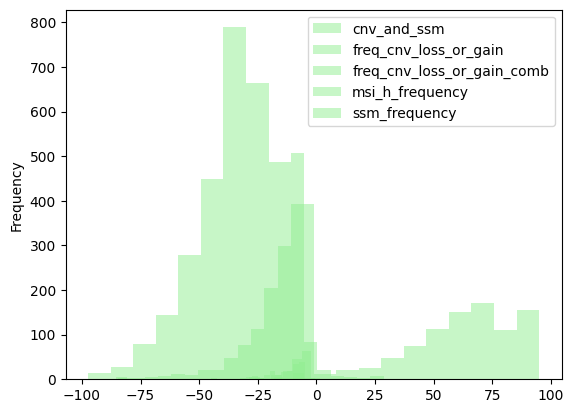

In [11]:
llama_results.groupby('intent')['delta_llama'].plot.hist(
    bins=20,
    alpha=0.5,
    legend=True,
    color='lightgreen'
)

cnv_and_ssm                                               questions  \
1767  What is the incidence of simple somatic mutati...   
1768  What is the incidence of simple somatic mutati...   
1769  What is the incidence of simple somatic mutati...   
1770  What is the incidence of simple somatic mutati...   
1771  How common are simple somatic mutations or cop...   
...                                                 ...   
5968  What percentage of cancer cases have simple so...   
5969  What fraction of cases have simple somatic mut...   
5970  How common are simple somatic mutations or cop...   
5971  What fraction of cases have simple somatic mut...   
5972  How common are simple somatic mutations or cop...   

                llama_base_output  llama_base_stat       intent  truth  \
1767    The final answer is: 0.0%             0.00  cnv_and_ssm  47.37   
1768    The final answer is: 0.0%             0.00  cnv_and_ssm   5.26   
1769   The final answer is: 0.03%             0.03  cnv_a

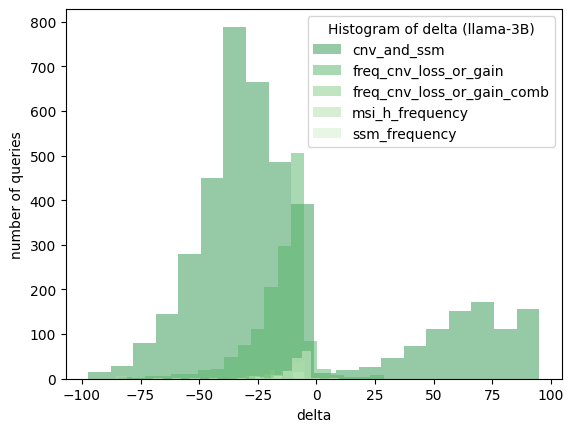

In [12]:
import matplotlib.cm as cm

groups = llama_results.groupby("intent")
n = len(groups)

# pick a colormap (Greens) and sample distinct shades
colors = cm.Greens_r(np.linspace(0.3, 0.8, n))  

for (name, group), color in zip(groups, colors):
    print(name, group)
    plt.hist(
        group['delta_llama'],
        bins=20,
        alpha=0.5,          # transparency
        color=color,
        label=str(name)
    )

plt.legend(title="Histogram of delta (llama-3B)")
plt.ylabel('number of queries')
plt.xlabel('delta')
plt.savefig('../figs/S1.png', bbox_inches='tight', dpi=300)

### GPT-4o
- around 826k tokens analyzed using openai batch API, total ~ $3.6

In [13]:
gpt_4o_results = pd.read_csv('../csvs/gpt4o_results.csv')

In [14]:
gpt_4o_results.head(n=2)

,questions,gpt-4o-2024-08-06_base_output,gpt4_base_stat,intent,gpt-4o-2024-08-06_references,truth,delta_gpt4
0,What is the frequency of somatic JAK2 heterozy...,The final answer is: 3.5%,3.5,freq_cnv_loss_or_gain,"[""Publication 1: Smith et al., 2022, 'Microsat...",15.02,-11.52
1,What is the frequency of somatic JAK2 heterozy...,The final answer is: 3.5%,3.5,freq_cnv_loss_or_gain,"['Genomic Data Commons, CS-MATCH-0007 Arm S1 M...",8.91,-5.41


In [15]:
gpt_4o_results.shape

(6011, 7)

In [16]:
gpt_4o_results['delta_gpt4'].describe()

count    6011.000000
mean      -22.197230
std        17.784734
min       -96.060000
25%       -33.190000
50%       -20.590000
75%        -8.860000
max        81.940000
Name: delta_gpt4, dtype: float64

In [17]:
gpt_4o_results.loc[gpt_4o_results['intent'] == 'top_cases_counts_by_gene', 'intent'] = 'cnv_and_ssm'

In [18]:
gpt_4o_results['intent'].value_counts()

intent
cnv_and_ssm                   4206
freq_cnv_loss_or_gain         1453
freq_cnv_loss_or_gain_comb     170
ssm_frequency                  144
msi_h_frequency                 38
Name: count, dtype: int64

In [19]:
gpt_4o_results.groupby('intent')['delta_gpt4'].describe()

,count,mean,std,min,25%,50%,75%,max
intent,,,,,,,,
cnv_and_ssm,4206.0,-26.103157,18.199668,-96.06,-36.5475,-26.07,-13.4525,81.94
freq_cnv_loss_or_gain,1453.0,-14.118624,12.527908,-82.04,-19.1900,-11.32,-6.3200,39.01
freq_cnv_loss_or_gain_comb,170.0,-10.319412,10.230617,-55.00,-15.9050,-8.76,-4.9025,53.91
msi_h_frequency,38.0,-20.886579,24.455999,-84.79,-23.8900,-16.10,-7.1250,28.12
ssm_frequency,144.0,-3.995278,8.222698,-39.71,-6.7600,-4.95,-2.2650,30.51


cnv_and_ssm                                               questions  \
1767  What is the incidence of simple somatic mutati...   
1768  What is the incidence of simple somatic mutati...   
1769  What is the incidence of simple somatic mutati...   
1770  What is the incidence of simple somatic mutati...   
1771  How common are simple somatic mutations or cop...   
...                                                 ...   
5968  What percentage of cancer cases have simple so...   
5969  What fraction of cases have simple somatic mut...   
5970  How common are simple somatic mutations or cop...   
5971  What fraction of cases have simple somatic mut...   
5972  How common are simple somatic mutations or cop...   

     gpt-4o-2024-08-06_base_output  gpt4_base_stat       intent  \
1767     The final answer is: 2.5%             2.5  cnv_and_ssm   
1768     The final answer is: 2.5%             2.5  cnv_and_ssm   
1769     The final answer is: 2.5%             2.5  cnv_and_ssm   
1770     Th

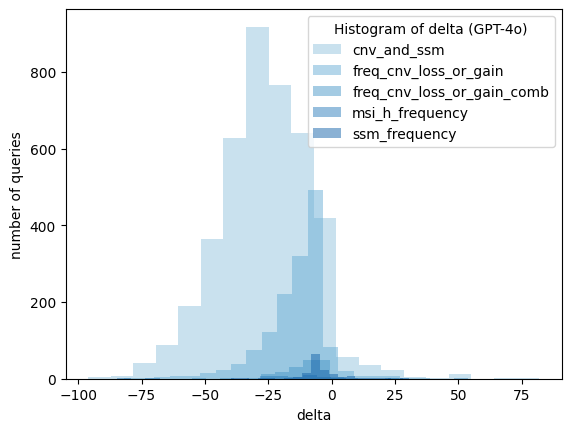

In [20]:
groups = gpt_4o_results.groupby("intent")
n = len(groups)

# skyblue colormap and sample distinct shades
colors = cm.Blues(np.linspace(0.4, 0.8, n))  

for (name, group), color in zip(groups, colors):
    print(name, group)
    plt.hist(
        group['delta_gpt4'],
        bins=20,
        alpha=0.5,          # transparency
        color=color,
        label=str(name)
    )

plt.legend(title="Histogram of delta (GPT-4o)")
plt.ylabel('number of queries')
plt.xlabel('delta')
plt.savefig('../figs/S2.png', bbox_inches='tight', dpi=300)

### Qwen-4B

In [21]:
qwen_results = pd.read_csv('../csvs/qwen_results.csv')

In [22]:
qwen_results.head(n=2)

,questions,qwen_base_output,qwen_base_stat,intent,truth,delta_qwen
0,What is the frequency of somatic JAK2 heterozy...,The final answer is: 0.15%,0.15,freq_cnv_loss_or_gain,15.02,-14.87
1,What is the frequency of somatic JAK2 heterozy...,The final answer is: 0.15%,0.15,freq_cnv_loss_or_gain,8.91,-8.76


In [23]:
qwen_results['delta_qwen'].describe()

count    6011.000000
mean      -17.688396
std        23.005192
min       -88.120000
25%       -31.210000
50%       -16.830000
75%        -5.810000
max        95.000000
Name: delta_qwen, dtype: float64

In [24]:
qwen_results.loc[qwen_results['intent'] == 'top_cases_counts_by_gene', 'intent'] = 'cnv_and_ssm'

In [25]:
qwen_results['intent'].value_counts()

intent
cnv_and_ssm                   4206
freq_cnv_loss_or_gain         1453
freq_cnv_loss_or_gain_comb     170
ssm_frequency                  144
msi_h_frequency                 38
Name: count, dtype: int64

In [26]:
qwen_results.groupby('intent')['delta_qwen'].describe()

,count,mean,std,min,25%,50%,75%,max
intent,,,,,,,,
cnv_and_ssm,4206.0,-20.656643,25.272759,-88.12,-35.5725,-22.110,-8.5200,95.00
freq_cnv_loss_or_gain,1453.0,-10.747171,14.974164,-84.42,-17.6900,-8.460,-0.8400,83.33
freq_cnv_loss_or_gain_comb,170.0,-12.679471,8.824298,-54.64,-17.7525,-10.070,-7.0500,4.21
msi_h_frequency,38.0,-9.297105,20.990380,-59.69,-15.2400,-7.300,3.1200,18.10
ssm_frequency,144.0,-9.157403,10.383759,-69.03,-9.4700,-6.235,-5.0875,7.43


cnv_and_ssm                                               questions  \
1805  What is the incidence of simple somatic mutati...   
1806  What is the incidence of simple somatic mutati...   
1807  What is the incidence of simple somatic mutati...   
1808  What is the incidence of simple somatic mutati...   
1809  How common are simple somatic mutations or cop...   
...                                                 ...   
6006  What percentage of cancer cases have simple so...   
6007  What fraction of cases have simple somatic mut...   
6008  How common are simple somatic mutations or cop...   
6009  What fraction of cases have simple somatic mut...   
6010  How common are simple somatic mutations or cop...   

                qwen_base_output  qwen_base_stat       intent  truth  \
1805  The final answer is: 0.12%            0.12  cnv_and_ssm  47.37   
1806  The final answer is: 0.15%            0.15  cnv_and_ssm   5.26   
1807  The final answer is: 0.12%            0.12  cnv_and_ssm  

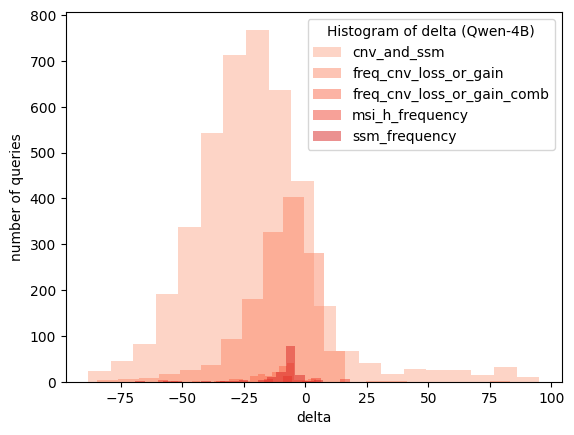

In [27]:
groups = qwen_results.groupby("intent")
n = len(groups)

# red colormap and sample distinct shades
colors = cm.Reds(np.linspace(0.3, 0.7, n))  

for (name, group), color in zip(groups, colors):
    print(name, group)
    plt.hist(
        group['delta_qwen'],
        bins=20,
        alpha=0.5,          # transparency
        color=color,
        label=str(name)
    )

plt.legend(title="Histogram of delta (Qwen-4B)")
plt.ylabel('number of queries')
plt.xlabel('delta')
plt.savefig('../figs/S3.png', bbox_inches='tight', dpi=300)

### gdc-qag

In [28]:
gdc_qag_results = pd.read_csv('../csvs/gdc_qag_results.csv')

In [29]:
gdc_qag_results.groupby('intent')['delta_gdc_qag'].describe()

,count,mean,std,min,25%,50%,75%,max
intent,,,,,,,,
cnv_and_ssm,4206.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq_cnv_loss_or_gain,1453.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq_cnv_loss_or_gain_comb,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
msi_h_frequency,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ssm_frequency,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


cnv_and_ssm                                               questions gene_entities  \
0     What is the incidence of simple somatic mutati...    ['PDGFRA']   
1     What is the incidence of simple somatic mutati...    ['PDGFRA']   
2     What is the incidence of simple somatic mutati...    ['PDGFRA']   
3     What is the incidence of simple somatic mutati...    ['PDGFRA']   
4     How common are simple somatic mutations or cop...    ['PDGFRA']   
...                                                 ...           ...   
4201  What percentage of cancer cases have simple so...       ['SMO']   
4202  What fraction of cases have simple somatic mut...      ['TSC1']   
4203  How common are simple somatic mutations or cop...      ['AKT3']   
4204  What fraction of cases have simple somatic mut...     ['FGFR3']   
4205  How common are simple somatic mutations or cop...     ['CHEK2']   

     mutation_entities            cancer_entities       intent  \
0                   []                   TCGA

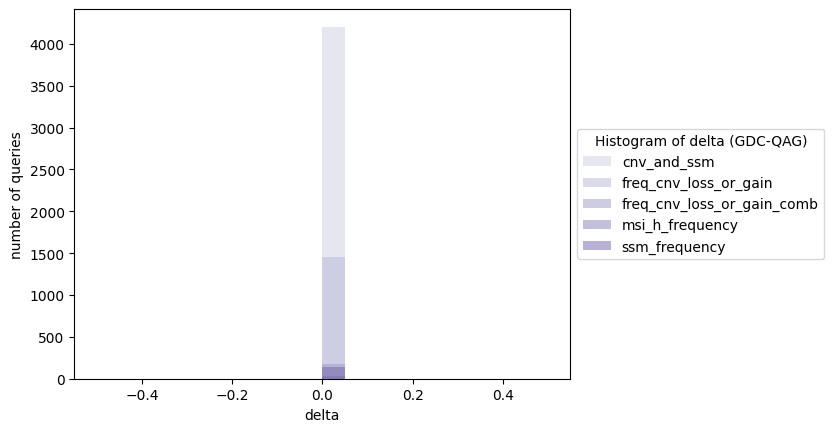

In [30]:
groups = gdc_qag_results.groupby("intent")
n = len(groups)

# purple colormap and sample distinct shades
colors = cm.Purples(np.linspace(0.3, 0.7, n))  

for (name, group), color in zip(groups, colors):
    print(name, group)
    plt.hist(
        group['delta_gdc_qag'],
        bins=20,
        alpha=0.5,          # transparency
        color=color,
        label=str(name)
    )

plt.legend(title="Histogram of delta (GDC-QAG)", loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('number of queries')
plt.xlabel('delta')
plt.savefig('../figs/delta_gdc_qag.png', bbox_inches='tight', dpi=300)

## Combine all data for plotting

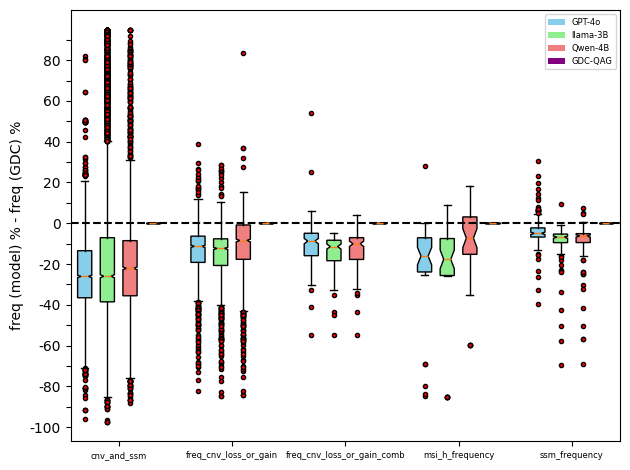

In [31]:
fig, ax = plt.subplots()
flier_props = dict(marker='o', markerfacecolor='red', markersize=3, linestyle='none')

grouped_gpt4_data = gpt_4o_results.groupby('intent')['delta_gpt4'].apply(list)
grouped_llama_data = llama_results.groupby('intent')['delta_llama'].apply(list)
grouped_qwen_data = qwen_results.groupby('intent')['delta_qwen'].apply(list)
grouped_gdc_qag_data = gdc_qag_results.groupby('intent')['delta_gdc_qag'].apply(list)

n = len(grouped_gpt4_data)
xlabels = list(grouped_gpt4_data.groupby('intent').groups.keys())

positions_gpt4 = np.arange(n) * 4
positions_llama = positions_gpt4 + 0.8
positions_qwen = positions_llama + 0.8
positions_gdc_qag = positions_qwen + 0.8


ax.boxplot(
    grouped_gpt4_data, positions=positions_gpt4,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='skyblue'),
    showmeans=False
)
ax.boxplot(
    grouped_llama_data, positions=positions_llama,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='lightgreen'),
    showmeans=False
)
ax.boxplot(
    grouped_qwen_data, positions=positions_qwen,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='lightcoral'),
    showmeans=False
)
ax.boxplot(
    grouped_gdc_qag_data, positions=positions_gdc_qag,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='purple'),
    showmeans=False
)

# x-axis ticks
all_positions = (positions_gpt4 + positions_llama + positions_qwen + positions_gdc_qag) / 4
ax.set_xticks(all_positions)
ax.set_xticklabels(xlabels, fontsize=6)

# yticks
yticks = np.arange(-100,100,10)
ax.set_yticks(yticks)
ytick_labels = [str(t) if t % 20 == 0 else '' for t in yticks]
ax.set_yticklabels(ytick_labels)

# ylabel
ax.set_ylabel('freq (model) % - freq (GDC) %')
ax.axhline(y=0, color='black', linestyle='--')

plt.tight_layout()
plt.title('')

# legend
legend_elements = [
    Patch(facecolor='skyblue', label='GPT-4o'),
    Patch(facecolor='lightgreen', label='llama-3B'),
    Patch(facecolor='lightcoral', label='Qwen-4B'),
    Patch(facecolor='purple', label='GDC-QAG'),
]
ax.legend(handles=legend_elements, loc='best', fontsize=6)
plt.show()


### Plot with significance values

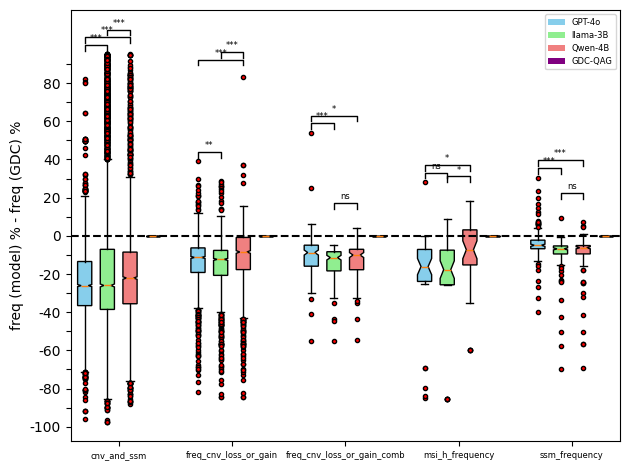

In [32]:
# spacing parameters
line_height = 3  # height of the vertical brackets
text_offset = 1  # how much higher the star goes above the bracket

from matplotlib.patches import Patch
from scipy.stats import ttest_ind

fig, ax = plt.subplots()
flier_props = dict(marker='o', markerfacecolor='red', markersize=3, linestyle='none')

grouped_gpt4_data = gpt_4o_results.groupby('intent')['delta_gpt4'].apply(list)
grouped_llama_data = llama_results.groupby('intent')['delta_llama'].apply(list)
grouped_qwen_data = qwen_results.groupby('intent')['delta_qwen'].apply(list)
grouped_gdc_qag_data = gdc_qag_results.groupby('intent')['delta_gdc_qag'].apply(list)


n = len(grouped_gpt4_data)
xlabels = list(grouped_gpt4_data.groupby('intent').groups.keys())
positions_gpt4 = np.arange(n) * 4
positions_llama = positions_gpt4 + 0.8
positions_qwen = positions_llama + 0.8
positions_gdc_qag = positions_qwen + 0.8


ax.boxplot(
    grouped_gpt4_data, positions=positions_gpt4,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='skyblue'),
    showmeans=False
)
ax.boxplot(
    grouped_llama_data, positions=positions_llama,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='lightgreen'),
    showmeans=False
)
ax.boxplot(
    grouped_qwen_data, positions=positions_qwen,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='lightcoral'),
    showmeans=False
)
ax.boxplot(
    grouped_gdc_qag_data, positions=positions_gdc_qag,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='purple'),
    showmeans=False
)


# x-axis ticks
all_positions = (positions_gpt4 + positions_llama + positions_qwen + positions_gdc_qag) / 4
ax.set_xticks(all_positions)
ax.set_xticklabels(xlabels, fontsize=6)

# yticks
yticks = np.arange(-100,100,10)
ax.set_yticks(yticks)
ytick_labels = [str(t) if t % 20 == 0 else '' for t in yticks]
ax.set_yticklabels(ytick_labels)

# ylabel
ax.set_ylabel('freq (model) % - freq (GDC) %')
ax.axhline(y=0, color='black', linestyle='--')


# Add significance stars inside plot
for i, intent in enumerate(xlabels):
    gpt_vals = grouped_gpt4_data[intent]
    llama_vals = grouped_llama_data[intent]
    qwen_vals = grouped_qwen_data[intent]

    # Compare GPT-4o vs LLaMA
    stat, p = ttest_ind(gpt_vals, llama_vals, equal_var=False)
    if p < 0.001:
        sig = '***'
    elif p < 0.01:
        sig = '**'
    elif p < 0.05:
        sig = '*'
    else:
        sig = 'ns'
    y = max(max(gpt_vals), max(llama_vals)) + 2
    x1, x2 = positions_gpt4[i], positions_llama[i]
    ax.plot([x1, x1, x2, x2], [y, y + line_height, y + line_height, y], color='black', lw=1)
    ax.text((x1 + x2) / 2, y + line_height + text_offset, sig, ha='center', va='bottom', fontsize=6)

    # Compare GPT-4o vs Qwen
    stat, p = ttest_ind(gpt_vals, qwen_vals, equal_var=False)
    sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'
    y = max(max(gpt_vals), max(qwen_vals)) + 6
    x1, x2 = positions_gpt4[i], positions_qwen[i]
    ax.plot([x1, x1, x2, x2], [y, y + line_height, y + line_height, y], color='black', lw=1)
    ax.text((x1 + x2) / 2, y + line_height + text_offset, sig, ha='center', va='bottom', fontsize=6)
    

    # Compare LLaMA vs Qwen
    stat, p = ttest_ind(llama_vals, qwen_vals, equal_var=False)
    sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'
    y = max(max(llama_vals), max(qwen_vals)) + 10
    x1, x2 = positions_llama[i], positions_qwen[i]
    ax.plot([x1, x1, x2, x2], [y, y + line_height, y + line_height, y], color='black', lw=1)
    ax.text((x1 + x2) / 2, y + line_height + text_offset, sig, ha='center', va='bottom', fontsize=6)


# Legend
legend_elements = [
    Patch(facecolor='skyblue', label='GPT-4o'),
    Patch(facecolor='lightgreen', label='llama-3B'),
    Patch(facecolor='lightcoral', label='Qwen-4B'),
    Patch(facecolor='purple', label='GDC-QAG'),
]
ax.legend(handles=legend_elements, loc='best', fontsize=6)

plt.tight_layout()
plt.title('')
plt.savefig('../figs/Fig2.png', bbox_inches='tight', dpi=300)

### Separate TCGA and non-TCGA questions

In [33]:
def return_tcga_label(x):
    if 'TCGA' in x['questions']:
        return 'TCGA'
    else:
        return 'Non-TCGA'

In [34]:
llama_results['is_tcga'] = llama_results.apply(
    lambda x: return_tcga_label(x), axis=1
)

In [35]:
gpt_4o_results['is_tcga'] = gpt_4o_results.apply(
    lambda x: return_tcga_label(x), axis=1
)

In [36]:
qwen_results['is_tcga'] = qwen_results.apply(
    lambda x: return_tcga_label(x), axis=1
)

### show TCGA and non-TCGA performance side-by-side for each LLM

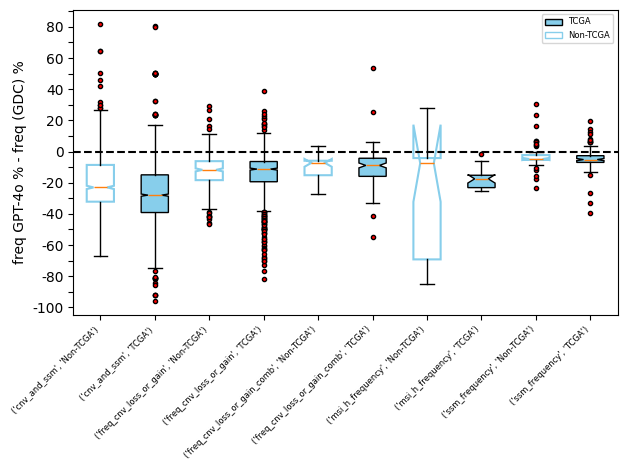

In [37]:
fig, ax = plt.subplots()
flier_props = dict(marker='o', markerfacecolor='red', markersize=3, linestyle='none')

# Grouped data
grouped_data = gpt_4o_results.groupby(['intent', 'is_tcga'])['delta_gpt4'].apply(list)

n = len(grouped_data)
xlabels = list(grouped_data.groupby(['intent', 'is_tcga']).groups.keys())
positions = np.arange(n)

# Boxplot with patch_artist=True to allow coloring
bp = ax.boxplot(
    grouped_data, positions=positions,
    notch=True, flierprops=flier_props,
    patch_artist=True, showmeans=False
)

# Color each box based on TCGA/Non-TCGA
for i, (patch, label) in enumerate(zip(bp['boxes'], xlabels)):
    is_tcga = label[1]  # the second item in tuple
    if is_tcga == 'TCGA':
        patch.set_facecolor('skyblue')
        patch.set_edgecolor('black')
    else:  # Non-TCGA
        patch.set_facecolor('none')            # hollow
        patch.set_edgecolor('skyblue')         # outline
        patch.set_linewidth(1.5)

# x-axis ticks
ax.set_xticks(positions)
ax.set_xticklabels(xlabels, fontsize=6, rotation=45, ha='right')

# y-axis ticks
yticks = np.arange(-100, 100, 10)
ax.set_yticks(yticks)
ytick_labels = [str(t) if t % 20 == 0 else '' for t in yticks]
ax.set_yticklabels(ytick_labels)

# Labels and baseline
ax.set_ylabel('freq GPT-4o % - freq (GDC) %')
ax.axhline(y=0, color='black', linestyle='--')

# Legend
legend_elements = [
    Patch(facecolor='skyblue', edgecolor='black', label='TCGA'),
    Patch(facecolor='none', edgecolor='skyblue', label='Non-TCGA')
]
ax.legend(handles=legend_elements, loc='best', fontsize=6)

plt.tight_layout()
plt.title('')
plt.show()

### add significance values to above plot

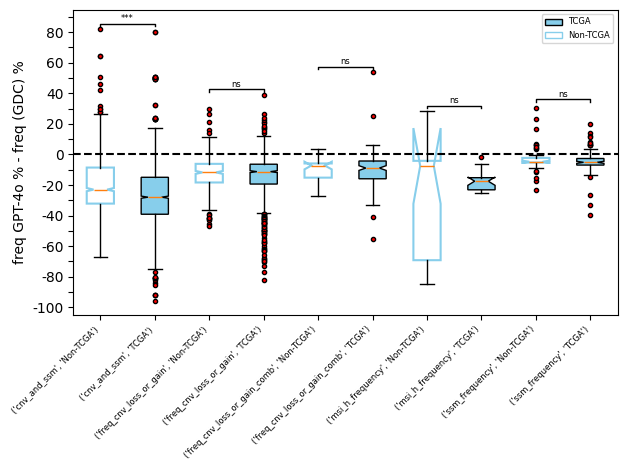

In [38]:
fig, ax = plt.subplots()
flier_props = dict(marker='o', markerfacecolor='red', markersize=3, linestyle='none')

# Grouped data
grouped_data = gpt_4o_results.groupby(['intent', 'is_tcga'])['delta_gpt4'].apply(list)

n = len(grouped_data)
xlabels = list(grouped_data.groupby(['intent', 'is_tcga']).groups.keys())
positions = np.arange(n)

# Boxplot with patch_artist=True to allow coloring
bp = ax.boxplot(
    grouped_data, positions=positions,
    notch=True, flierprops=flier_props,
    patch_artist=True, showmeans=False
)

# Color each box based on TCGA/Non-TCGA
for i, (patch, label) in enumerate(zip(bp['boxes'], xlabels)):
    is_tcga = label[1]  # the second item in tuple
    if is_tcga == 'TCGA':
        patch.set_facecolor('skyblue')
        patch.set_edgecolor('black')
    else:  # Non-TCGA
        patch.set_facecolor('none')            # hollow
        patch.set_edgecolor('skyblue')         # outline
        patch.set_linewidth(1.5)

# x-axis ticks
ax.set_xticks(positions)
ax.set_xticklabels(xlabels, fontsize=6, rotation=45, ha='right')

# y-axis ticks
yticks = np.arange(-100, 100, 10)
ax.set_yticks(yticks)
ytick_labels = [str(t) if t % 20 == 0 else '' for t in yticks]
ax.set_yticklabels(ytick_labels)

# Labels and baseline
ax.set_ylabel('freq GPT-4o % - freq (GDC) %')
ax.axhline(y=0, color='black', linestyle='--')

# Legend
legend_elements = [
    Patch(facecolor='skyblue', edgecolor='black', label='TCGA'),
    Patch(facecolor='none', edgecolor='skyblue', label='Non-TCGA')
]
ax.legend(handles=legend_elements, loc='best', fontsize=6)

# Parameters for bracket spacing
line_height = 1.5
text_offset = 0.5
buffer_above_box = 2.0

# Create a mapping from labels to position
label_to_pos = {label: pos for label, pos in zip(xlabels, positions)}

# For each intent, compare TCGA vs Non-TCGA
used_y = []  # to stack brackets nicely

for intent in set(label[0] for label in xlabels):
    try:
        # Extract values
        tcga_vals = grouped_data[(intent, 'TCGA')]
        non_tcga_vals = grouped_data[(intent, 'Non-TCGA')]

        # Get their boxplot positions
        x1 = label_to_pos[(intent, 'TCGA')]
        x2 = label_to_pos[(intent, 'Non-TCGA')]

        # Perform t-test
        stat, p = ttest_ind(tcga_vals, non_tcga_vals, equal_var=False)
        sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'

        # Choose bracket height just above the taller box
        y_base = max(max(tcga_vals), max(non_tcga_vals)) + buffer_above_box
        # Avoid overlap with previous brackets
        while any(abs(y_base - y) < (line_height + text_offset + 1) for y in used_y):
            y_base += 2
        used_y.append(y_base)

        # Draw the bracket
        ax.plot([x1, x1, x2, x2], [y_base, y_base + line_height, y_base + line_height, y_base], color='black', lw=1)

        # Add significance stars
        ax.text((x1 + x2) / 2, y_base + line_height + text_offset, sig,
                ha='center', va='bottom', fontsize=6)

    except KeyError:
        # One of the groups is missing — skip
        continue

plt.tight_layout()
plt.title('')
plt.savefig('../figs/S4.png', bbox_inches='tight', dpi=300)


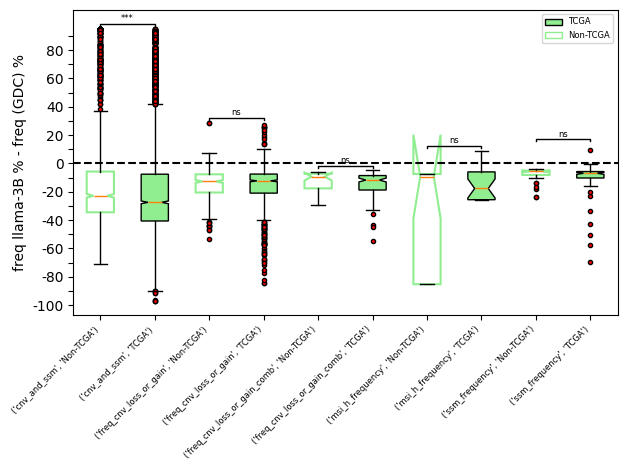

In [39]:
fig, ax = plt.subplots()
flier_props = dict(marker='o', markerfacecolor='red', markersize=3, linestyle='none')

# Grouped data
grouped_data = llama_results.groupby(['intent', 'is_tcga'])['delta_llama'].apply(list)

n = len(grouped_data)
xlabels = list(grouped_data.groupby(['intent', 'is_tcga']).groups.keys())
positions = np.arange(n)

# Boxplot with patch_artist=True to allow coloring
bp = ax.boxplot(
    grouped_data, positions=positions,
    notch=True, flierprops=flier_props,
    patch_artist=True, showmeans=False
)

# Color each box based on TCGA/Non-TCGA
for i, (patch, label) in enumerate(zip(bp['boxes'], xlabels)):
    is_tcga = label[1]  # the second item in tuple
    if is_tcga == 'TCGA':
        patch.set_facecolor('lightgreen')
        patch.set_edgecolor('black')
    else:  # Non-TCGA
        patch.set_facecolor('none')            # hollow
        patch.set_edgecolor('lightgreen')         # outline
        patch.set_linewidth(1.5)

# x-axis ticks
ax.set_xticks(positions)
ax.set_xticklabels(xlabels, fontsize=6, rotation=45, ha='right')

# y-axis ticks
yticks = np.arange(-100, 100, 10)
ax.set_yticks(yticks)
ytick_labels = [str(t) if t % 20 == 0 else '' for t in yticks]
ax.set_yticklabels(ytick_labels)

# Labels and baseline
ax.set_ylabel('freq llama-3B % - freq (GDC) %')
ax.axhline(y=0, color='black', linestyle='--')

# Legend
legend_elements = [
    Patch(facecolor='lightgreen', edgecolor='black', label='TCGA'),
    Patch(facecolor='none', edgecolor='lightgreen', label='Non-TCGA')
]
ax.legend(handles=legend_elements, loc='best', fontsize=6)

# Parameters for bracket spacing
line_height = 1.5
text_offset = 0.5
buffer_above_box = 2.0

# Create a mapping from labels to position
label_to_pos = {label: pos for label, pos in zip(xlabels, positions)}

# For each intent, compare TCGA vs Non-TCGA
used_y = []  # to stack brackets nicely

for intent in set(label[0] for label in xlabels):
    try:
        # Extract values
        tcga_vals = grouped_data[(intent, 'TCGA')]
        non_tcga_vals = grouped_data[(intent, 'Non-TCGA')]

        # Get their boxplot positions
        x1 = label_to_pos[(intent, 'TCGA')]
        x2 = label_to_pos[(intent, 'Non-TCGA')]

        # Perform t-test
        stat, p = ttest_ind(tcga_vals, non_tcga_vals, equal_var=False)
        sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'

        # Choose bracket height just above the taller box
        y_base = max(max(tcga_vals), max(non_tcga_vals)) + buffer_above_box
        # Avoid overlap with previous brackets
        while any(abs(y_base - y) < (line_height + text_offset + 1) for y in used_y):
            y_base += 2
        used_y.append(y_base)

        # Draw the bracket
        ax.plot([x1, x1, x2, x2], [y_base, y_base + line_height, y_base + line_height, y_base], color='black', lw=1)

        # Add significance stars
        ax.text((x1 + x2) / 2, y_base + line_height + text_offset, sig,
                ha='center', va='bottom', fontsize=6)

    except KeyError:
        # One of the groups is missing — skip
        continue

plt.tight_layout()
plt.title('')
plt.savefig('../figs/S5.png', bbox_inches='tight', dpi=300)


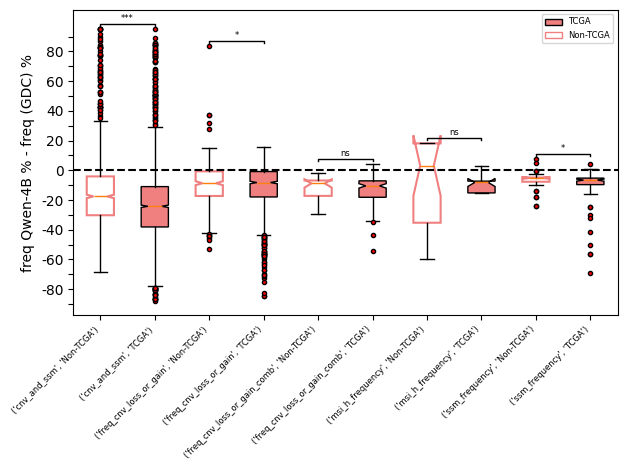

In [40]:
from scipy.stats import ttest_ind

fig, ax = plt.subplots()
flier_props = dict(marker='o', markerfacecolor='red', markersize=3, linestyle='none')

# Grouped data
grouped_data = qwen_results.groupby(['intent', 'is_tcga'])['delta_qwen'].apply(list)

n = len(grouped_data)
xlabels = list(grouped_data.groupby(['intent', 'is_tcga']).groups.keys())
positions = np.arange(n)

# Boxplot with patch_artist=True to allow coloring
bp = ax.boxplot(
    grouped_data, positions=positions,
    notch=True, flierprops=flier_props,
    patch_artist=True, showmeans=False
)

# Color each box based on TCGA/Non-TCGA
for i, (patch, label) in enumerate(zip(bp['boxes'], xlabels)):
    is_tcga = label[1]  # the second item in tuple
    if is_tcga == 'TCGA':
        patch.set_facecolor('lightcoral')
        patch.set_edgecolor('black')
    else:  # Non-TCGA
        patch.set_facecolor('none')            # hollow
        patch.set_edgecolor('lightcoral')         # outline
        patch.set_linewidth(1.5)

# x-axis ticks
ax.set_xticks(positions)
ax.set_xticklabels(xlabels, fontsize=6, rotation=45, ha='right')

# y-axis ticks
yticks = np.arange(-100, 100, 10)
ax.set_yticks(yticks)
ytick_labels = [str(t) if t % 20 == 0 else '' for t in yticks]
ax.set_yticklabels(ytick_labels)

# Labels and baseline
ax.set_ylabel('freq Qwen-4B % - freq (GDC) %')
ax.axhline(y=0, color='black', linestyle='--')

# Legend
legend_elements = [
    Patch(facecolor='lightcoral', edgecolor='black', label='TCGA'),
    Patch(facecolor='none', edgecolor='lightcoral', label='Non-TCGA')
]
ax.legend(handles=legend_elements, loc='best', fontsize=6)


# Parameters for bracket spacing
line_height = 1.5
text_offset = 0.5
buffer_above_box = 2.0

# Create a mapping from labels to position
label_to_pos = {label: pos for label, pos in zip(xlabels, positions)}

# For each intent, compare TCGA vs Non-TCGA
used_y = []  # to stack brackets nicely

for intent in set(label[0] for label in xlabels):
    try:
        # Extract values
        tcga_vals = grouped_data[(intent, 'TCGA')]
        non_tcga_vals = grouped_data[(intent, 'Non-TCGA')]

        # Get their boxplot positions
        x1 = label_to_pos[(intent, 'TCGA')]
        x2 = label_to_pos[(intent, 'Non-TCGA')]

        # Perform t-test
        stat, p = ttest_ind(tcga_vals, non_tcga_vals, equal_var=False)
        sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'

        # Choose bracket height just above the taller box
        y_base = max(max(tcga_vals), max(non_tcga_vals)) + buffer_above_box
        # Avoid overlap with previous brackets
        while any(abs(y_base - y) < (line_height + text_offset + 1) for y in used_y):
            y_base += 2
        used_y.append(y_base)

        # Draw the bracket
        ax.plot([x1, x1, x2, x2], [y_base, y_base + line_height, y_base + line_height, y_base], color='black', lw=1)

        # Add significance stars
        ax.text((x1 + x2) / 2, y_base + line_height + text_offset, sig,
                ha='center', va='bottom', fontsize=6)

    except KeyError:
        # One of the groups is missing — skip
        continue

plt.tight_layout()
plt.title('')
plt.savefig('../figs/S6.png', bbox_inches='tight', dpi=300)



### separate heterozygous deletions, gains and amplifications into different categories

In [41]:
def return_cnv_type(x):
    if 'heterozygous deletion' in x:
        cnv_type = 'heterozygous deletion'
    elif 'gain' in x:
        cnv_type = 'gain'
    elif 'amplification' in x:
        cnv_type = 'amplification'
    else:
        cnv_type = 'NA'
    return cnv_type

In [42]:
llama_results['cnv_type'] = llama_results['questions'].apply(return_cnv_type)
gpt_4o_results['cnv_type'] = gpt_4o_results['questions'].apply(return_cnv_type)
qwen_results['cnv_type'] = qwen_results['questions'].apply(return_cnv_type)
gdc_qag_results['cnv_type'] = gdc_qag_results['questions'].apply(return_cnv_type)

In [43]:
llama_cnv = llama_results[llama_results['intent'].str.contains('freq_cnv_loss')]
gpt4_cnv = gpt_4o_results[gpt_4o_results['intent'].str.contains('freq_cnv_loss')]
qwen_cnv = qwen_results[qwen_results['intent'].str.contains('freq_cnv_loss')]
gdc_qag_cnv = gdc_qag_results[gdc_qag_results['intent'].str.contains('freq_cnv_loss')]

In [44]:
# the two NAs are for the two homozygous deletion questions
llama_cnv['cnv_type'].value_counts()

cnv_type
heterozygous deletion    819
gain                     642
amplification            160
NA                         2
Name: count, dtype: int64

In [45]:
gpt4_cnv['cnv_type'].value_counts()

cnv_type
heterozygous deletion    819
gain                     642
amplification            160
NA                         2
Name: count, dtype: int64

In [46]:
qwen_cnv['cnv_type'].value_counts()

cnv_type
heterozygous deletion    819
gain                     642
amplification            160
NA                         2
Name: count, dtype: int64

In [47]:
gdc_qag_cnv['cnv_type'].value_counts()

cnv_type
heterozygous deletion    819
gain                     642
amplification            160
NA                         2
Name: count, dtype: int64

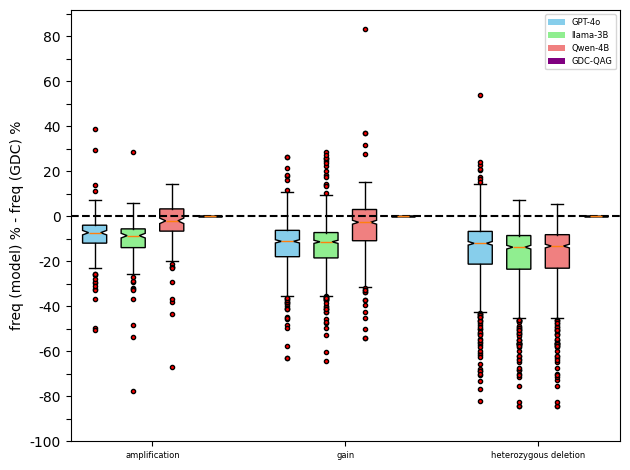

In [48]:
fig, ax = plt.subplots()
flier_props = dict(marker='o', markerfacecolor='red', markersize=3, linestyle='none')

# remove the couple of NA for hom dels since only two points
gpt4_cnv = gpt4_cnv[gpt4_cnv['cnv_type']!='NA']
llama_cnv = llama_cnv[llama_cnv['cnv_type']!='NA']
qwen_cnv = qwen_cnv[qwen_cnv['cnv_type']!='NA']
gdc_qag_cnv = gdc_qag_cnv[gdc_qag_cnv['cnv_type']!='NA']

grouped_gpt4_data = gpt4_cnv.groupby('cnv_type')['delta_gpt4'].apply(list)
grouped_llama_data = llama_cnv.groupby('cnv_type')['delta_llama'].apply(list)
grouped_qwen_data = qwen_cnv.groupby('cnv_type')['delta_qwen'].apply(list)
grouped_gdc_qag_data = gdc_qag_cnv.groupby('cnv_type')['delta_gdc_qag'].apply(list)

n = len(grouped_gpt4_data)
xlabels = list(grouped_gpt4_data.groupby('cnv_type').groups.keys())
positions_gpt4 = np.arange(n) * 4
positions_llama = positions_gpt4 + 0.8
positions_qwen = positions_llama + 0.8
positions_gdc_qag = positions_qwen + 0.8

ax.boxplot(
    grouped_gpt4_data, positions=positions_gpt4,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='skyblue', edgecolor='black'),
    showmeans=False
)
ax.boxplot(
    grouped_llama_data, positions=positions_llama,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='lightgreen', edgecolor='black'),
    showmeans=False
)
ax.boxplot(
    grouped_qwen_data, positions=positions_qwen,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='lightcoral', edgecolor='black'),
    showmeans=False
)
ax.boxplot(
    grouped_gdc_qag_data, positions=positions_gdc_qag,
    notch=True, flierprops=flier_props, patch_artist=True, boxprops=dict(facecolor='purple', edgecolor='black'),
    showmeans=False
)


# x-axis ticks
all_positions = (positions_gpt4 + positions_llama + positions_qwen + positions_gdc_qag) / 4
ax.set_xticks(all_positions)
ax.set_xticklabels(xlabels, fontsize=6)

# yticks
yticks = np.arange(-100,100,10)
ax.set_yticks(yticks)
ytick_labels = [str(t) if t % 20 == 0 else '' for t in yticks]
ax.set_yticklabels(ytick_labels)

# ylabel
ax.set_ylabel('freq (model) % - freq (GDC) %')
ax.axhline(y=0, color='black', linestyle='--')

plt.tight_layout()
plt.title('')

# legend
legend_elements = [
    Patch(facecolor='skyblue', label='GPT-4o'),
    Patch(facecolor='lightgreen', label='llama-3B'),
    Patch(facecolor='lightcoral', label='Qwen-4B'),
    Patch(facecolor='purple', label='GDC-QAG'),
]
ax.legend(handles=legend_elements, loc='best', fontsize=6)


### add significance values

In [49]:
# prepare data
gpt4_cnv['model'] = 'GPT-4o'
llama_cnv['model'] = 'llama-3B'
qwen_cnv['model'] = 'Qwen-4B'
gdc_qag_cnv['model'] = 'GDC-QAG'

gpt4_cnv['delta'] = gpt4_cnv['delta_gpt4']
llama_cnv['delta'] = llama_cnv['delta_llama']
qwen_cnv['delta'] = qwen_cnv['delta_qwen']
gdc_qag_cnv['delta'] = gdc_qag_cnv['delta_gdc_qag']

all_cnv_data = pd.concat([
    gpt4_cnv, llama_cnv, qwen_cnv, gdc_qag_cnv
])

In [50]:
# packages
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

3.0 vs. 3.8: t-test independent samples, P_val:6.879e-01 t=4.018e-01
3.8 vs. 4.6: t-test independent samples, P_val:3.321e-39 t=-1.355e+01
0.0 vs. 0.8: t-test independent samples, P_val:2.140e-02 t=2.312e+00
0.8 vs. 1.6: t-test independent samples, P_val:1.351e-10 t=-6.641e+00
6.0 vs. 6.8: t-test independent samples, P_val:4.464e-05 t=4.093e+00
6.8 vs. 7.6: t-test independent samples, P_val:3.661e-01 t=-9.041e-01
3.0 vs. 4.6: t-test independent samples, P_val:1.845e-39 t=-1.360e+01
0.0 vs. 1.6: t-test independent samples, P_val:2.046e-05 t=-4.325e+00
6.0 vs. 7.6: t-test independent samples, P_val:1.545e-03 t=3.171e+00


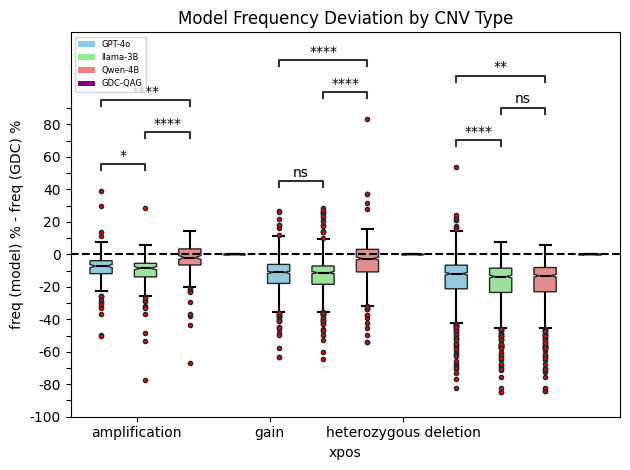

In [51]:
# Plot
fig, ax = plt.subplots()

flier_props = dict(marker='o', markerfacecolor='red', markersize=3, linestyle='none')

palette = {
    'GPT-4o': 'skyblue',
    'llama-3B': 'lightgreen',
    'Qwen-4B': 'lightcoral',
    'GDC-QAG': 'purple'
}
# positions_gpt4, positions_llama, positions_qwen, positions_gdc_qag
# (array([0, 3, 6]), array([0.8, 3.8, 6.8]), array([1.6, 4.6, 7.6]), array([2.4, 5.4, 8.4]))
positions_map = {
    'amplification_GPT-4o': 0,
    'gain_GPT-4o': 3,
    'heterozygous deletion_GPT-4o': 6,
    'amplification_llama-3B': 0.8,
    'gain_llama-3B': 3.8,
    'heterozygous deletion_llama-3B': 6.8,
    'amplification_Qwen-4B': 1.6,
    'gain_Qwen-4B': 4.6,
    'heterozygous deletion_Qwen-4B': 7.6,
    'amplification_GDC-QAG': 2.4,
    'gain_GDC-QAG': 5.4,
    'heterozygous deletion_GDC-QAG': 8.4,

}

def numeric_category(x):
    k = '_'.join([x['cnv_type'], x['model']])
    return positions_map[k]


all_cnv_data['xpos'] = all_cnv_data.apply(
    lambda x: numeric_category(x), axis = 1
)
sns.boxplot(data=all_cnv_data, x='xpos', y='delta', hue='model', notch=True, flierprops=flier_props, palette=palette, width=0.5)

# Access the box patches and modify
for patch in ax.artists:
    patch.set_edgecolor('black')
    patch.set_linewidth(2.5)

# Customize boxplot lines (whiskers, medians, caps)
for line in ax.lines:
    line.set_color('black')
    line.set_linewidth(1.5)

# Y-axis tick formatting
yticks = np.arange(-100, 100, 10)
ax.set_yticks(yticks)
ax.set_yticklabels([str(t) if t % 20 == 0 else '' for t in yticks])

group_xticks = [0.8, 3.8, 6.8]
group_labels = ['amplification', 'gain', 'heterozygous deletion']
ax.set_xticks(group_xticks)
ax.set_xticklabels(group_labels)

# Add significance with statannotations
annotator_pairs = [
    (positions_map['gain_GPT-4o'], positions_map['gain_llama-3B']),
    (positions_map['gain_GPT-4o'], positions_map['gain_Qwen-4B']),
    (positions_map['gain_llama-3B'], positions_map['gain_Qwen-4B']),
    
    (positions_map['amplification_GPT-4o'], positions_map['amplification_llama-3B']),
    (positions_map['amplification_GPT-4o'], positions_map['amplification_Qwen-4B']),
    (positions_map['amplification_llama-3B'], positions_map['amplification_Qwen-4B']),

    (positions_map['heterozygous deletion_GPT-4o'], positions_map['heterozygous deletion_llama-3B']),
    (positions_map['heterozygous deletion_GPT-4o'], positions_map['heterozygous deletion_Qwen-4B']),
    (positions_map['heterozygous deletion_llama-3B'], positions_map['heterozygous deletion_Qwen-4B']),
]
annotator = Annotator(ax, annotator_pairs, data=all_cnv_data, x='xpos', y='delta')
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()


plt.axhline(0, linestyle='--', color='black')
plt.ylabel("freq (model) % - freq (GDC) %")
plt.title("Model Frequency Deviation by CNV Type")
ax.legend(handles=legend_elements, loc='best', fontsize=6)
plt.tight_layout()
plt.show()

### matplotlib plot with p-values

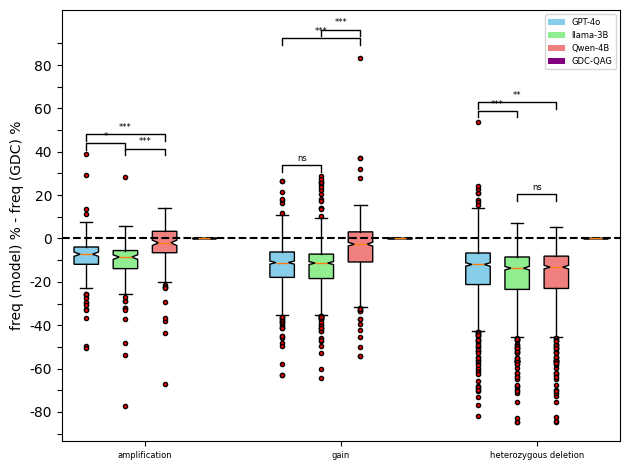

In [52]:
# spacing parameters
line_height = 3  # height of the vertical brackets
text_offset = 1  # how much higher the star goes above the bracket

from matplotlib.patches import Patch
from scipy.stats import ttest_ind

fig, ax = plt.subplots()
flier_props = dict(marker='o', markerfacecolor='red', markersize=3, linestyle='none')

# Clean NA
gpt4_cnv = gpt4_cnv[gpt4_cnv['cnv_type'] != 'NA']
llama_cnv = llama_cnv[llama_cnv['cnv_type'] != 'NA']
qwen_cnv = qwen_cnv[qwen_cnv['cnv_type'] != 'NA']
gdc_qag_cnv = gdc_qag_cnv[gdc_qag_cnv['cnv_type'] != 'NA']

# Group data
grouped_gpt4_data = gpt4_cnv.groupby('cnv_type')['delta_gpt4'].apply(list)
grouped_llama_data = llama_cnv.groupby('cnv_type')['delta_llama'].apply(list)
grouped_qwen_data = qwen_cnv.groupby('cnv_type')['delta_qwen'].apply(list)
grouped_gdc_qag_data = gdc_qag_cnv.groupby('cnv_type')['delta_gdc_qag'].apply(list)

n = len(grouped_gpt4_data)
xlabels = list(grouped_gpt4_data.groupby('cnv_type').groups.keys())
positions_gpt4 = np.arange(n) * 4
positions_llama = positions_gpt4 + 0.8
positions_qwen = positions_llama + 0.8
positions_gdc_qag = positions_qwen + 0.8

# Plot boxplots
ax.boxplot(grouped_gpt4_data, positions=positions_gpt4, notch=True, flierprops=flier_props,
           patch_artist=True, boxprops=dict(facecolor='skyblue'))
ax.boxplot(grouped_llama_data, positions=positions_llama, notch=True, flierprops=flier_props,
           patch_artist=True, boxprops=dict(facecolor='lightgreen'))
ax.boxplot(grouped_qwen_data, positions=positions_qwen, notch=True, flierprops=flier_props,
           patch_artist=True, boxprops=dict(facecolor='lightcoral'))
ax.boxplot(grouped_gdc_qag_data, positions=positions_gdc_qag, notch=True, flierprops=flier_props,
           patch_artist=True, boxprops=dict(facecolor='purple'))


# Axis labels
all_positions = (positions_gpt4 + positions_llama + positions_qwen + positions_gdc_qag) / 4
ax.set_xticks(all_positions)
ax.set_xticklabels(xlabels, fontsize=6)

yticks = np.arange(-100, 100, 10)
ax.set_yticks(yticks)
ax.set_yticklabels([str(t) if t % 20 == 0 else '' for t in yticks])
ax.set_ylabel('freq (model) % - freq (GDC) %')
ax.axhline(y=0, color='black', linestyle='--')

# Add significance stars inside plot
for i, cnv_type in enumerate(xlabels):
    gpt_vals = grouped_gpt4_data[cnv_type]
    llama_vals = grouped_llama_data[cnv_type]
    qwen_vals = grouped_qwen_data[cnv_type]

    # Compare GPT-4o vs LLaMA
    stat, p = ttest_ind(gpt_vals, llama_vals, equal_var=False)
    if p < 0.001:
        sig = '***'
    elif p < 0.01:
        sig = '**'
    elif p < 0.05:
        sig = '*'
    else:
        sig = 'ns'
    y = max(max(gpt_vals), max(llama_vals)) + 2
    x1, x2 = positions_gpt4[i], positions_llama[i]
    ax.plot([x1, x1, x2, x2], [y, y + line_height, y + line_height, y], color='black', lw=1)
    ax.text((x1 + x2) / 2, y + line_height + text_offset, sig, ha='center', va='bottom', fontsize=6)

    # Compare GPT-4o vs Qwen
    stat, p = ttest_ind(gpt_vals, qwen_vals, equal_var=False)
    sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'
    y = max(max(gpt_vals), max(qwen_vals)) + 6
    x1, x2 = positions_gpt4[i], positions_qwen[i]
    ax.plot([x1, x1, x2, x2], [y, y + line_height, y + line_height, y], color='black', lw=1)
    ax.text((x1 + x2) / 2, y + line_height + text_offset, sig, ha='center', va='bottom', fontsize=6)
    

    # Compare LLaMA vs Qwen
    stat, p = ttest_ind(llama_vals, qwen_vals, equal_var=False)
    sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'
    y = max(max(llama_vals), max(qwen_vals)) + 10
    x1, x2 = positions_llama[i], positions_qwen[i]
    ax.plot([x1, x1, x2, x2], [y, y + line_height, y + line_height, y], color='black', lw=1)
    ax.text((x1 + x2) / 2, y + line_height + text_offset, sig, ha='center', va='bottom', fontsize=6)


# Legend
legend_elements = [
    Patch(facecolor='skyblue', label='GPT-4o'),
    Patch(facecolor='lightgreen', label='llama-3B'),
    Patch(facecolor='lightcoral', label='Qwen-4B'),
    Patch(facecolor='purple', label='GDC-QAG'),

]
ax.legend(handles=legend_elements, loc='best', fontsize=6)

plt.tight_layout()
plt.title('')
plt.savefig('../figs/Fig3.png', bbox_inches='tight', dpi=300)